In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [17]:
# create engine to hawaii.sqlite
engine=create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
base=automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [28]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [38]:
# Save references to each table
station=base.classes.station

measurement=base.classes.measurement

In [40]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
recent_date=(session.query(measurement.date)
             .order_by(measurement.date.desc())
                .first())
recent_date

('2017-08-23',)

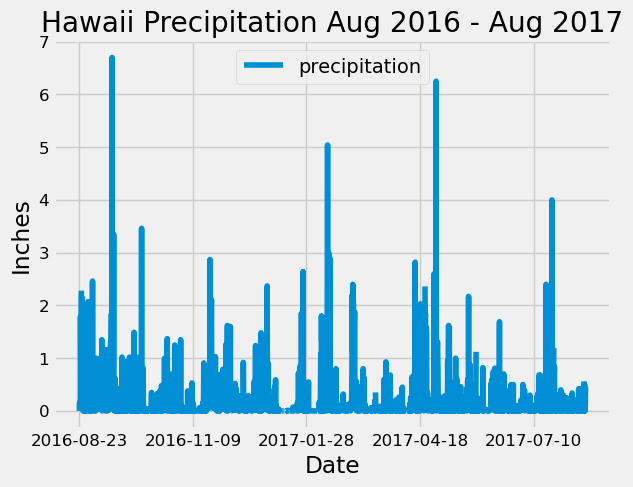

In [61]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
one_year=dt.date(2017, 8, 23)-dt.timedelta(days=365)
# Calculate the date one year from the last date in data set.
prev_last_date=dt.date(one_year.year, one_year.month, one_year.day)
# Perform a query to retrieve the data and precipitation scores
results=session.query(measurement.date, measurement.prcp).filter(measurement.date>=prev_last_date).order_by(measurement.date).all()
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df =pd.DataFrame(results, columns=['date', 'precipitation'])
# Sort the dataframe by date
data_df.set_index(data_df['date'], inplace=True)
# Use Pandas Plotting with Matplotlib to plot the data
data_df.plot('date', 'precipitation')


plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Hawaii Precipitation Aug 2016 - Aug 2017")
plt.legend(["precipitation"])
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

In [65]:
# Use Pandas to calculate the summary statistics for the precipitation data
data_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [67]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [69]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
    .filter(measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

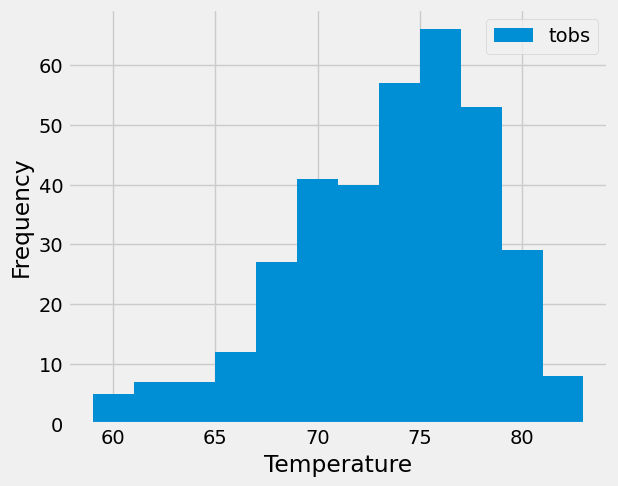

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).filter(measurement.station=='USC00519281')\
    .filter(measurement.date>='2016-08-23').all()

high_station_temp=pd.DataFrame(results,columns=['tobs'])
high_station_temp.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")
plt.ylabel("Frequency")

plt.show()

# Close Session

In [75]:
# Close Session
session.close()